In [1]:
import os
import json
import matplotlib.pyplot as plt

In [2]:
def read_json_history_files_from_folder(path_history):
    #Get the names of every model stored in the specified foler
    filenames = [filename for filename in os.listdir(path_history) if filename.endswith('.json')]
    historical_array, networks_names = [], []

    for filename in filenames:
        with open(os.path.join(path_history, filename), 'r') as json_file:
            #Save the data from every json file in an array
            historical_array.append(json.load(json_file))
            #Save the name of every model in an array with the extension '.json'
            networks_names.append(filename[:-5])
    return historical_array, networks_names

In [55]:
def plot_history_models(path_history):
    
    historical_array, networks_names = read_json_history_files_from_folder(path_history)
    epochs = range(1, len(historical_array[0]['loss'])+1)
    
    
    fig, axs = plt.subplots(2,2, figsize=(12,8))#, constrained_layout=True)

    # Flatten the axis array for easy iteration
    axs = axs.ravel()
    
    #Training Accuracy
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_title('Training accuracy')
    for i in range(len(networks_names)):
        axs[0].plot(epochs, historical_array[i]['accuracy'], label = networks_names[i])
    axs[0].legend(loc = 'lower right')
    axs[0].set_ylim([0, 1])
    
    #Validation Accuracy
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].set_title('Validation accuracy')
    for i in range(len(networks_names)):
        axs[1].plot(epochs, historical_array[i]['val_accuracy'], label = networks_names[i])
    axs[1].legend(loc = 'lower right')
    axs[1].set_ylim([0, 1])
    
    #Training Loss
    axs[2].set_xlabel('Epochs')
    axs[2].set_ylabel('Loss')
    axs[2].set_title('Training loss')
    for i in range(len(networks_names)):
        axs[2].plot(epochs, historical_array[i]['loss'], label = networks_names[i])
    axs[2].legend(loc = 'best')
    axs[2].set_ylim([0, 6])
    
    #Validation Loss
    axs[3].set_xlabel('Epochs')
    axs[3].set_ylabel('Loss')
    axs[3].set_title('Validation loss')
    for i in range(len(networks_names)):
        axs[3].plot(epochs, historical_array[i]['val_loss'], label = networks_names[i])
    axs[3].legend(loc = 'best')
    axs[3].set_ylim([0, 6])
    
    fig.suptitle('Comparing performance on classifiers models')#, fontsize = 40)
    plt.tight_layout()
    plt.savefig('images/comparison_performance_model.png', dpi=300, bbox_inches='tight')
    plt.show()

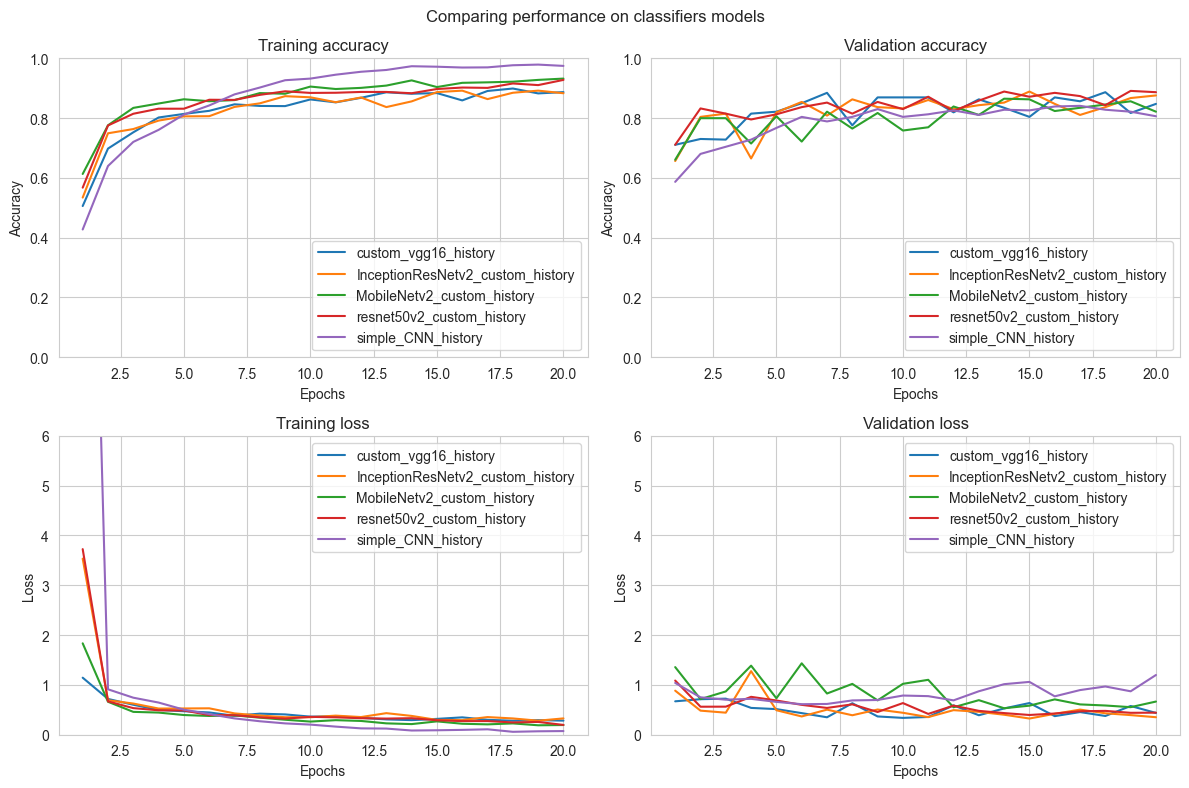

In [56]:
plot_history_models('Saved_models_and_history')